<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NNTwoLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
mat = scipy.io.loadmat('data.mat')
xTrain = np.array(mat['data']['test'][0][0][0][0][0])
yTrain = np.array(mat['data']['test'][0][0][0][0][1])

xTest = np.array(mat['data']['training'][0][0][0][0][0])
yTest = np.array(mat['data']['training'][0][0][0][0][1])

xValidation = np.array(mat['data']['validation'][0][0][0][0][1])
yValidation = np.array(mat['data']['validation'][0][0][0][0][0])

In [13]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  return np.exp(x) / np.exp(x).sum(axis=0)

def lossFunction(y_true, y_pred):
  loss = -y_true[y_true == 1] @ np.log(y_pred[y_true == 1] + 1e-15) #Cross-entropy
  return loss / len(y_true)

def feedforward(data):
  predict = classifier.feedforward(data)[1]
  return [np.argmax(item) for item in predict.T]


In [9]:
class Classifier:

  def __init__(self, weights, learningRate=0.01, epochs=1000):
    self.weights = weights
    self.learningRate = learningRate
    self.epochs = epochs
    self.loss = list()
  
  def feedforward(self, data):
    h = sigmoid(self.weights[0] @ data)
    y = softmax(self.weights[1] @ h)
    return (h,y)
  
  def train(self, data, y_true):

    for epoch in tqdm(range(self.epochs)):

      forward = self.feedforward(data) 
      firstLayerOutput, secondLayerOutput = forward[0], forward[1]

      # SecondLayer
      dL_dpredict = -y_true / secondLayerOutput
      dpredict_dsoftMax = secondLayerOutput * (dL_dpredict - (dL_dpredict * secondLayerOutput).sum(axis=0))
      dL_dweightSecondLayer = dpredict_dsoftMax @ firstLayerOutput.T
      
      # FirstLayer
      dL_dhidden = self.weights[1].T @ dpredict_dsoftMax
      dL_dsigmoid = firstLayerOutput * (1 - firstLayerOutput) * dL_dhidden
      dL_dweightFirstLayer = dL_dsigmoid @ data.T 
      
      # Coefficients update
      self.weights[1] -= self.learningRate * dL_dweightSecondLayer / len(data)
      self.weights[0] -= self.learningRate * dL_dweightFirstLayer / len(data)

      # Loss calculation
      self.loss.append(lossFunction(y_true.T, secondLayerOutput.T))

In [10]:
wieghts = [np.random.randn(128, 256) * np.sqrt(2/256), np.random.randn(10, 128) * np.sqrt(2/128)]
classifier = Classifier(wieghts)
classifier.train(xTrain, yTrain)

100%|██████████| 1000/1000 [01:57<00:00,  8.52it/s]


In [14]:
confMatrixTest = [[0 for i in range(10)] for j in range(10)]
confMatrixTrain = [[0 for i in range(10)] for j in range(10)]
confMatrixValidation = [[0 for i in range(10)] for j in range(10)]

testPredictions = feedforward(xTest)
validationPredictions = feedforward(xValidation)
trainPredictions = feedforward(xTrain)

for index in range(len(trainPredictions)):
  if index < 1000:
    confMatrixTest[np.argmax(yTest.T[index])][testPredictions[index]] += 1
    confMatrixValidation[np.argmax(yValidation.T[index])][validationPredictions[index]] += 1
  confMatrixTrain[np.argmax(yTrain.T[index])][trainPredictions[index]] += 1

In [15]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

93.4


[[93, 1, 0, 0, 1, 1, 0, 1, 3, 0],
 [1, 97, 0, 0, 0, 0, 0, 0, 2, 0],
 [1, 1, 92, 0, 0, 1, 3, 0, 2, 0],
 [1, 0, 1, 89, 0, 4, 1, 0, 3, 1],
 [0, 0, 0, 0, 93, 0, 3, 0, 0, 4],
 [1, 1, 0, 4, 0, 91, 1, 0, 2, 0],
 [3, 0, 1, 0, 2, 0, 94, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 98, 0, 2],
 [0, 1, 0, 0, 0, 2, 0, 1, 96, 0],
 [0, 1, 1, 0, 4, 0, 0, 1, 2, 91]]

In [16]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

94.0


[[95, 0, 0, 0, 2, 0, 1, 0, 2, 0],
 [0, 97, 0, 1, 0, 0, 0, 0, 2, 0],
 [0, 0, 92, 3, 1, 0, 1, 0, 3, 0],
 [0, 0, 1, 93, 0, 5, 0, 0, 1, 0],
 [0, 1, 0, 0, 93, 0, 5, 0, 0, 1],
 [1, 1, 2, 3, 0, 87, 1, 2, 3, 0],
 [0, 2, 1, 0, 1, 0, 96, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 96, 0, 4],
 [0, 2, 0, 0, 2, 3, 0, 0, 93, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 98]]

In [17]:
print(np.sum([confMatrixTrain[i][i] for i in range(10)]) / yTrain.shape[1] * 100)
confMatrixTrain

95.85555555555555


[[879, 4, 1, 0, 4, 5, 4, 0, 3, 0],
 [1, 870, 1, 7, 5, 0, 3, 2, 11, 0],
 [4, 6, 842, 8, 3, 7, 15, 3, 9, 3],
 [3, 0, 13, 845, 0, 18, 3, 9, 6, 3],
 [1, 5, 2, 0, 869, 0, 11, 1, 0, 11],
 [6, 3, 3, 16, 3, 855, 4, 3, 7, 0],
 [4, 8, 4, 0, 6, 2, 876, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 881, 0, 16],
 [3, 12, 6, 8, 2, 19, 1, 2, 844, 3],
 [1, 2, 0, 0, 10, 1, 0, 15, 5, 866]]

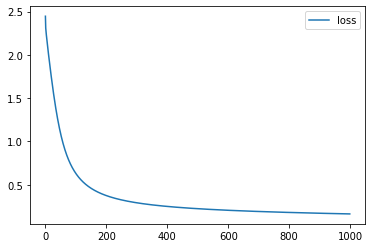

In [18]:
plt.plot(classifier.loss, label='loss')
plt.legend()